<div style="direction:rtl;", align="center" ><h1>
<span style='font-family:"B Nazanin"'>
    پروژه درس آمار و احتمال مهندسی

<div style="direction:rtl;", align="center" ><h3>
<span style='font-family:"B Nazanin"'>
اعضای گروه : سارا برادران (شماره دانشجویی : 9624193) علیرضا صالحی (شماره دانشجویی : 9729833) 
<br><br>
رشته مهندسی کامپیوتر
<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در این پروژه از دیتاست churn استفاده کرده ایم که حاوی اطلاعات مربوط مشتریان یک شرکت مخابراتی است (مشابه همراه اول یا ایرانسل) در داخل این دیتاست اطلاعاتی از جمله دقایق تماس شب، دقایق تماس روز و عصر، دقایق تماس های بین المللی، تعداد تماس های روز شب و عصر و بین المللی هر کدام به تفکیک، استفاده یا عدم استفاده از سرویس ها و بسته های خاص مانند voice mail یا بسته international (که مربوط به  تماس های بین المللی است)، همچین تعداد  پیام های voice mail مشتری، تعداد تماس های وی با واحد پشتیبانی و سابقه ترک شرکت توسط وی آورده شده است.
هدف از انجام این پروژه بررسی عوامل ترک شرکت توسط مشتریان و پیش بینی ترک می باشد.

In [1]:
import pandas as pd

churn = pd.read_csv('churn')
churn.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,False


In [2]:
print('Dataset has {} rows and {} columns'.format(churn.shape[0], churn.shape[1]))

Dataset has 3333 rows and 22 columns


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Intl Plan       3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
یک ستون تحت عنوان Avg Mins اضافه می کنیم که نمایانگر میانگین دقایق تماس روز، عصر، شب و بین الملل است.

In [4]:
churn ['Avg Mins'] = (churn['Day Mins'] + churn['Eve Mins'] + churn['Night Mins'] + churn['Intl Mins']) / 4

In [5]:
churn.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Old Churn,Churn,Avg Mins
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,False,179.30
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,False,156.30
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,False,134.85
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,False,141.20
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,False,128.00


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
شاخص های آماری نظیر ستون های دیتاست (حاوی تعداد رکورد های هر ستون، میانگین، انحراف معیار، مینیمم و ماکسیمم، چارک ها)

In [6]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Avg Mins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,147.966194
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,22.488563
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,71.075000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,132.875000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,148.400000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,163.100000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,221.250000


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار هیستوگرام نظیر ستون دقایق تماس عصر (Eve Mins)

<AxesSubplot:>

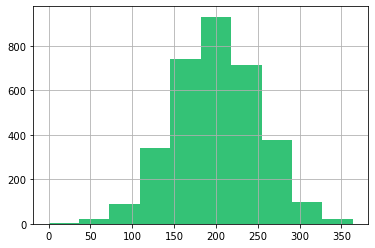

In [7]:
churn['Eve Mins'].hist(color='#34c276')

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
شاخص های آماری نظیر ستون دقایق تماس عصر (Eve Mins)

In [8]:
print('mean     = ', churn['Eve Mins'].mean())
print('variance = ', churn['Eve Mins'].var())
print('median   = ', churn['Eve Mins'].median())

mean     =  200.98034803480346
variance =  2571.8940164454552
median   =  201.4


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
آزمون آماری زیر نشان می دهد متغیر eve mins دارای یک توزیع نرمال است. این موضوع از روی نمودار هیستوگرام نیز تاحدودی قابل تشخیص است.

In [9]:
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors

p_value = lilliefors(churn['Eve Mins'])[1]
print('p_value = ', p_value)

if p_value < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p_value =  0.2662682986370542
we accept null hypothesis


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار هیستوگرام نظیر ستون دقایق تماس شب (Night Mins)

<AxesSubplot:>

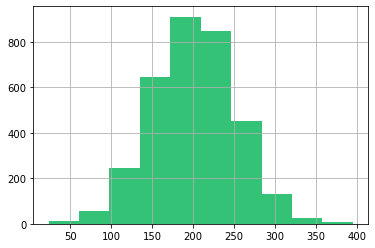

In [10]:
churn['Night Mins'].hist(color='#34c276')

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
شاخص های آماری نظیر ستون دقایق تماس شب (Night Mins)

In [11]:
print('mean     = ', churn['Night Mins'].mean())
print('variance = ', churn['Night Mins'].var())
print('median   = ', churn['Night Mins'].median())

mean     =  200.87203720372048
variance =  2557.714001760915
median   =  201.2


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
آزمون آماری زیر نشان می دهد متغیر night mins دارای یک توزیع نرمال است. این موضوع از روی نمودار هیستوگرام نیز تاحدودی قابل تشخیص است.

In [12]:

p_value = lilliefors(churn['Night Mins'])[1]
print('p_value = ', p_value)

if p_value < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p_value =  0.8641937039349863
we accept null hypothesis


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار هیستوگرام نظیر ستون دقایق تماس روز (Day Mins)

<AxesSubplot:>

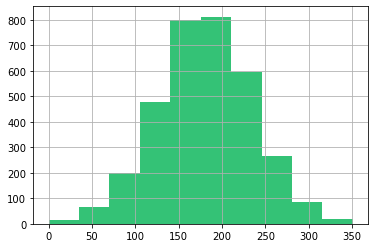

In [13]:
churn['Day Mins'].hist(color='#34c276')

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
شاخص های آماری نظیر ستون دقایق تماس روز (Day Mins)

In [14]:
print('mean     = ', churn['Day Mins'].mean())
print('variance = ', churn['Day Mins'].var())
print('median   = ', churn['Day Mins'].median())

mean     =  179.77509750975116
variance =  2966.696486522607
median   =  179.4


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
آزمون آماری زیر نشان می دهد متغیر day mins دارای یک توزیع نرمال است. این موضوع از روی نمودار هیستوگرام نیز تاحدودی قابل تشخیص است.

In [15]:

p_value = lilliefors(churn['Day Mins'])[1]
print('p_value = ', p_value)

if p_value < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p_value =  0.7101356478506542
we accept null hypothesis


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار هیستوگرام نظیر ستون دقایق تماس بین الملل (Intl Mins)

<AxesSubplot:>

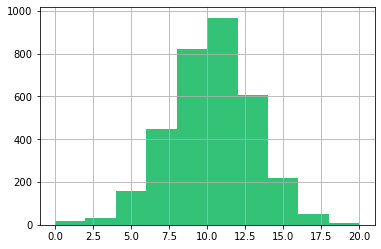

In [16]:
churn['Intl Mins'].hist(color='#34c276')

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
شاخص های آماری نظیر ستون دقایق تماس بین الملل (Intl Mins)

In [17]:
print('mean     = ', churn['Intl Mins'].mean())
print('variance = ', churn['Intl Mins'].var())
print('median   = ', churn['Intl Mins'].median())

mean     =  10.237293729372933
variance =  7.794368064057332
median   =  10.3


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
آزمون آماری زیر نشان می دهد متغیر intl mins دارای یک توزیع نرمال نیست.

In [18]:

p_value = lilliefors(churn['Intl Mins'])[1]
print('p_value = ', p_value)

if p_value < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p_value =  0.0009999999999998899
we reject null hypothesis


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار هیستوگرام نظیر ستون میانگین دقایق تماس مشتری (شامل همه انواع تماس ها) (Avg Mins)

<AxesSubplot:>

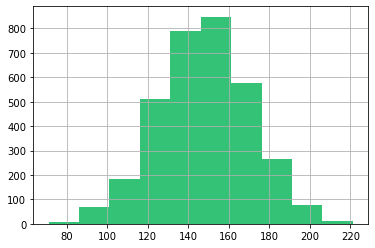

In [19]:
churn['Avg Mins'].hist(color='#34c276')

<div style="direction:rtl;", align="" ><h3>
<span style='font-family:"B Nazanin"'>
شاخص های آماری نظیر ستون میانگین دقایق تماس مشتری (Avg Mins)

In [20]:
print('mean     = ', churn['Avg Mins'].mean())
print('variance = ', churn['Avg Mins'].var())
print('median   = ', churn['Avg Mins'].median())

mean     =  147.96619411941208
variance =  505.73545627172984
median   =  148.39999999999998


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
آزمون آماری زیر نشان می دهد متغیر Avg mins دارای یک توزیع نرمال است.

In [21]:

p_value = lilliefors(churn['Avg Mins'])[1]
print('p_value = ', p_value)

if p_value < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p_value =  0.7089813210233339
we accept null hypothesis


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار ستونی نظیر تعداد تماس مشتریان با واحد پشتیبانی (Customer Service Calls)
با توجه به این نمودار به نظر میرسد درصد زیادی از مشتریان 0 الی 3 تماس با واحد پشتیبانی داشته اند. 

<AxesSubplot:xlabel='CustServ Calls', ylabel='count'>

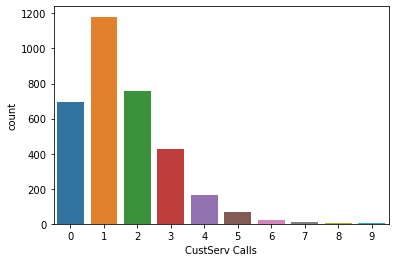

In [22]:
import seaborn as sns

sns.countplot(x ='CustServ Calls', data = churn[['CustServ Calls']])

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
جدول زیر درصد فراوانی تعداد تماس ها با پشتیبانی را نشان می دهد همانطور که در نمودار فوق نیز مشخص شد قریب به 92 درصد از مشتریان 0 الی 3 تماس با واحد پشتیبانی داشته اند و 8 درصد باقی مانده یعنی حدود 267 مشتری از میان 3333 مشتری بیش از 3 تماس با واحد پشتیانی داشته اند 

In [23]:
((churn['CustServ Calls'].value_counts() / len(churn) ) * 100)

1    35.433543
2    22.772277
0    20.912091
3    12.871287
4     4.980498
5     1.980198
6     0.660066
7     0.270027
8     0.060006
9     0.060006
Name: CustServ Calls, dtype: float64

<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار دایره ای زیر درصد مشتریانی که شرکت را ترک کرده اند را نشان می دهد. با توجه به این نمودار از میان 3333 مشتری که اطلاعات آن ها در این دیتاست موجود است 14 درصد از آن ها یعنی حدود 467 نفر سازمان را ترک کرده اند.

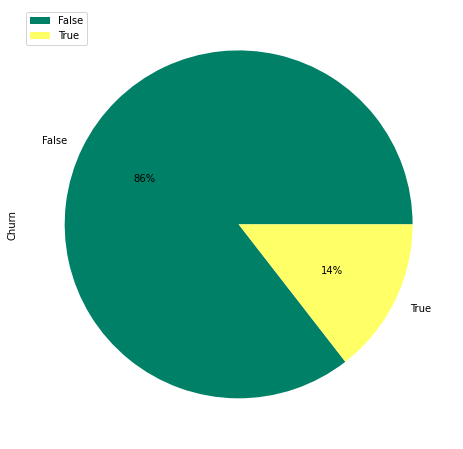

In [24]:
import matplotlib.pyplot as plt

df = pd.DataFrame(churn['Churn'].value_counts(),index=list(churn['Churn'].unique()),columns=['Churn'])
plot = df.plot.pie(y='Churn', figsize=(8, 8),autopct='%.0f%%', cmap='summer')
plt.legend(loc='upper left')

<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار دایره ای نظیر درصد مشتریانی که از سرویس voice mail plan استفاده می کنند. با توجه به نمودار 28 درصد از کل مشتریان از این سرویس استفاده می کنند و 72 درصد از آن استفاده نمی کنند.

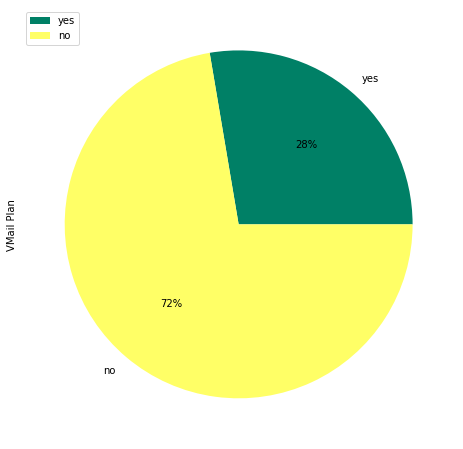

In [25]:
import matplotlib.pyplot as plt

df = pd.DataFrame(churn['VMail Plan'].value_counts(),index=list(churn['VMail Plan'].unique()),columns=['VMail Plan'])
plot = df.plot.pie(y='VMail Plan', figsize=(8, 8),autopct='%.0f%%', cmap='summer')
plt.legend(loc='upper left')

<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار دایره ای نظیر درصد مشتریانی که از سرویس international plan استفاده می کنند. با توجه به نمودار 10 درصد از کل مشتریان از این سرویس استفاده می کنند و 90 درصد از آن استفاده نمی کنند. 

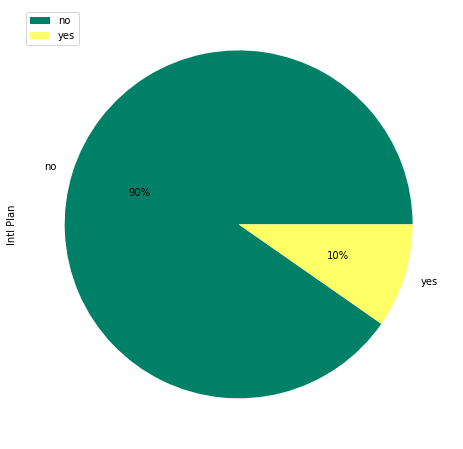

In [26]:
df = pd.DataFrame(churn['Intl Plan'].value_counts(),index=list(churn['Intl Plan'].unique()),columns=['Intl Plan'])
plot = df.plot.pie(y='Intl Plan', figsize=(8, 8),autopct='%.0f%%', cmap='summer')
plt.legend(loc='upper left')

<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در نمودار زیر رابطه میان متغیر خروجی یعنی churn با متغیر Vmail plan بررسی شده است به عبارت دیگر سعی داریم کشف کنیم داشتن یا نداشتن سرویس voice mail چه تاثیری بر ترک یا عدم ترک مشتریان داشته است. با توجه به نتایج بدست آمده مشخص شده است که مشتریانی که از سرویس voice mail استفاده کرده اند درصد ترک کمتری داشته اند و بالعکس کسانی که از این سرویس استفاده نکرده اند دو برابر بیش تر از کسانی که سرویس را داشته اند سازمان را ترک کرده اند. لذا به نظر میرسد این سرویس کارامد و مفید بوده است و مشتریان را تاحدودی جذب کرده است.

<AxesSubplot:xlabel='VMail Plan'>

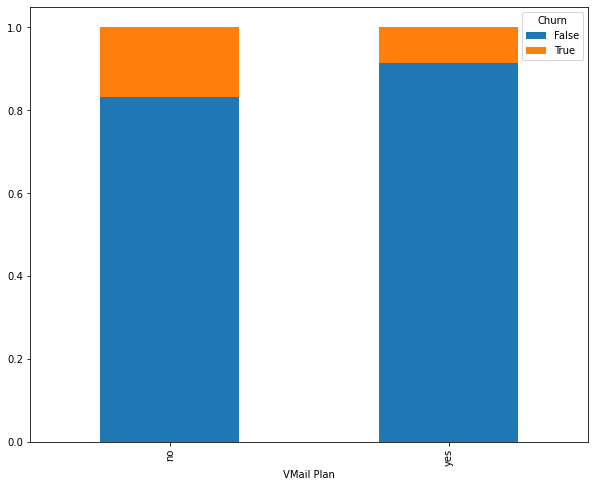

In [27]:
crosstab_01 = pd.crosstab(churn['VMail Plan'], churn['Churn'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (10, 8))

In [28]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1) / 100, axis = 0)
crosstab_norm

Churn,False,True
VMail Plan,,
no,83.284944,16.715056
yes,91.323210,8.676790


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در نمودار زیر رابطه میان متغیر خروجی یعنی churn با متغیر Intl plan بررسی شده است به عبارت دیگر سعی داریم کشف کنیم داشتن یا نداشتن سرویس international چه تاثیری بر ترک یا عدم ترک مشتریان داشته است. با توجه به نتایج بدست آمده مشخص است که مشتریانی که از سرویس international استفاده کرده اند بیش از 42 درصد آن ها سازمان را ترک کرده انددر حالی که مشتریانی که از این سرویس استفاده نکرده اند حدود 11 درصد از آنها سازمان را ترک کرده اند. لذا به نظر می رسد این سرویس کارآمد و مفید نبوده و تاثیر نامطلوبی بر جذب مشتری داشته است.

<AxesSubplot:xlabel='Intl Plan'>

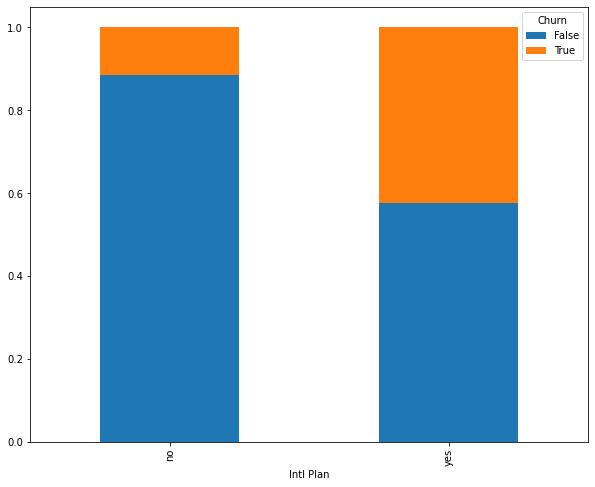

In [29]:
crosstab_01 = pd.crosstab(churn['Intl Plan'], churn['Churn'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (10, 8))

In [30]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1) / 100, axis = 0)
crosstab_norm

Churn,False,True
Intl Plan,,
no,88.504983,11.495017
yes,57.585139,42.414861


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در نمودار زیر رابطه میان متغیر خروجی یعنی churn با متغیر CustServ Calls که همان تعداد تماس با واحد پشتیبانی است بررسی شده است به عبارت دیگر سعی داریم کشف کنیم تعداد تماس مشتریان با واحد پشتیبانی سازمان چه تاثیری بر ترک یا عدم ترک آن ها داشته است. با توجه به نتایج بدست آمده مشخص است که مشتریانی تعداد تماس آن ها با واحد پشتیبانی 0 الی 3 مورد بوده است تنها 10 الی 13 درصد از آن ها سازمان را ترک کرده اند در حالی که در میان افرادی که 4 الی 8 تماس با واحد پشتیبانی داشته اند درصد ترک 45 الی 64 درصد بوده و درصد ترک افرادی که 9 تماس با واحد پشتیبانی داشته اند به 100 درصد رسیده است.  با توجه به نتایج بدست آمده به نظر می رسد احتمالا تماس های زیاد مشتریان با واحد پشتیبانی به معنای عدم رضایتمندی آن ها از خدمات سازمان بوده و نتیجا موجب ترک آن ها شده است. 

<AxesSubplot:xlabel='CustServ Calls'>

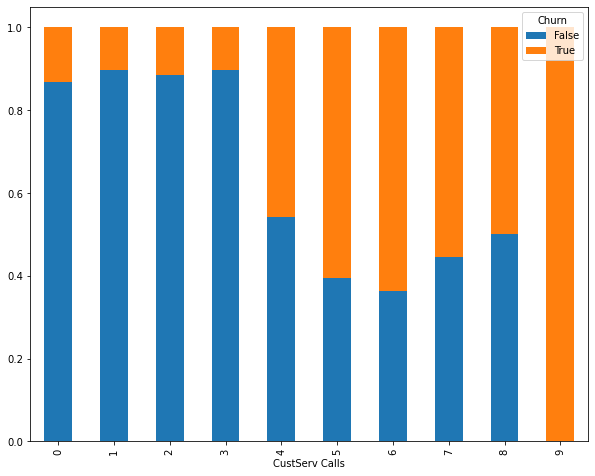

In [31]:
crosstab_01 = pd.crosstab(churn['CustServ Calls'], churn['Churn'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (10, 8))

In [32]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1) / 100, axis = 0)
crosstab_norm

Churn,False,True
CustServ Calls,,
0,86.800574,13.199426
1,89.669771,10.330229
2,88.537549,11.462451
3,89.743590,10.256410
4,54.216867,45.783133
5,39.393939,60.606061
6,36.363636,63.636364
7,44.444444,55.555556
8,50.000000,50.000000


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در شکل زیر نمودار heatmap رسم شده است که نمایانگر ضریب همبستگی میان ستون های مختلف دیتاست است. خانه های تیره رنگ نشان دهنده همبستگی قوی میان دو متغیر مربوطه است برای مثال دو متغیر Day mins , Day charge درون دیتاست ضریبا همبستگی pearsonr نظیر آن ها 1 بدست آمده است و اگر بررسی کنیم متوجه میشویم این دو ضریبی از یکدیگر هستند از نظر مفهومی نیز این امر قابل توجیه است چراکه تعداد دقایق تماس یک فرد ضریبی از شارژ خریداری شده توسط اوست و اگر شارژ وی به پایان برسد امکان برقراری تماس را نخواهد داشت. این موضوع برای متغیر های دیگری درون دیتاست نیز برقرار است.
<div style="direction:ltr;", align="justify" ><h3>    
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

<AxesSubplot:>

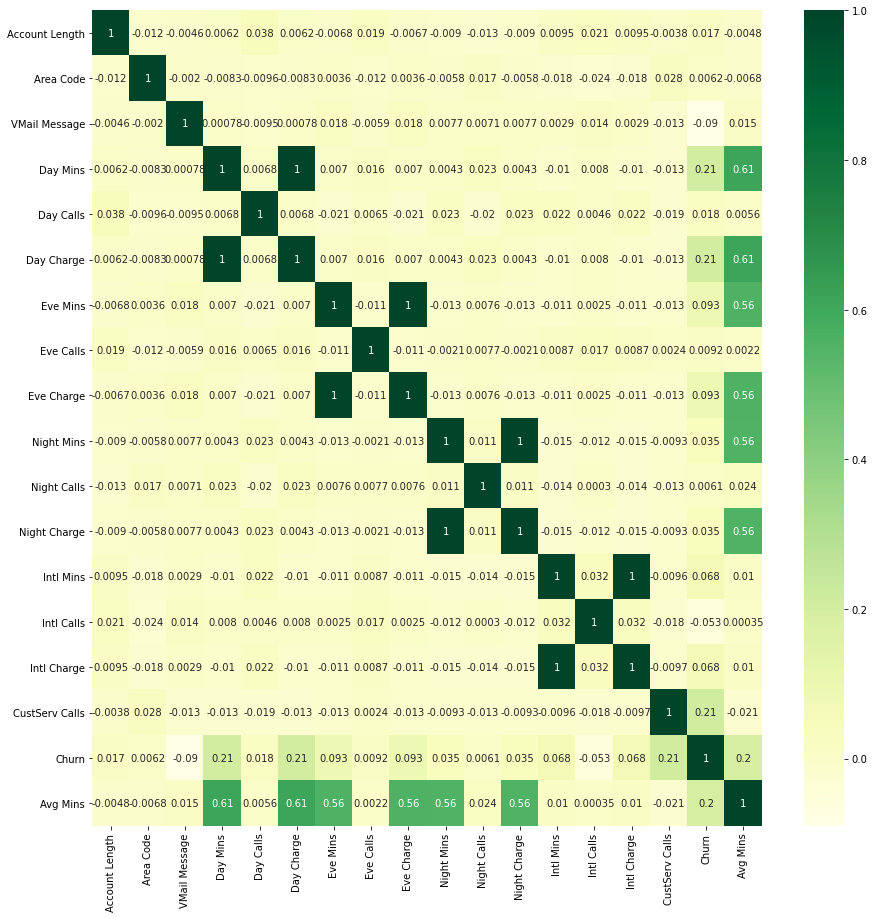

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(15,15))

sns.heatmap(churn.corr(), annot = True, fmt='.2g',cmap= 'YlGn')

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
ضریب همبستگی یا همان correlation coefficient یک عدد بین - 1 تا 1 است که معین می سازد دو متغیر از مجموعه داده ها تا
چه میزان به هم مربوط هستند. هرچه correlation coefficient مربوط به دو متغیر به عدد 1 نزدیک تر باشد بدان معناست که با
افزایش مقدار یک متغیر متغیر دیگر نیز به صورت مرتبط مقدار آن افزایش می یابد و ضریب همبستگی هر چه به عدد - 1 نزدیک تر باشد
بدان معناست که دو متغیر رابطه عکس داشته و با افزایش مقدار یکی مقدار دیگری به نحوی مرتبط کاهش می یابد هرچه ضریب همبستگی
به عدد 0 نزدیک تر باشد به این معناست که دو متغیر فاقد رابطه خاصی هستند.
مقدار p_value نیز به این صورت قابل تعریف است : اگر در مسئله کشف رابطه میان دو متغیر یک فرضیه صفر مبنی بر اینکه دو متغیر
مورد نظر هیچ رابطه ای ندارند در نظر بگیریم آنگاه p_value مقداری بین 0 و 1 است که نمایانگر احتمال وجود داده ها برمبنای درست
بودن فرضیه صفر است. یعنی اگر مقدار p_value کوچک باشد به این معناست که احتمال درست بودن فرضیه صفر پایین بوده و لذا
متغیر ها دارای ارتباط هستند و درصورتی که بزرگ باشد به این معناست که احتمال درست بودن فرضیه صفر زیاد بوده و لذا متغیر ها فاقد
ارتباط هستند.

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در دو مثال زیر یکبار رابطه شارژ روزانه و تعداد تماس های روزانه و بار دیگر رابطه بین دو متغیر شارژ روزانه و دقایق تماس روزانه بررسی شده است در حالت اول ضریب همبستگی حدود 6 صدم بدست آمده و p-value نزدیک به 7 بدست آمده که هر دو حاکی از عدم وجود رابطه خاص بین این دو متغیر است در مثال دوم ضریب همبستگی نزدیک به 1 درآمده و p-value برابر 0 شده است که هردو حاکی  از رابطه و همبستگی قوی میان دو متغیر  است همانطور که بالاتر هم بررسی شد دقایق تماس روزانه ضریبی از مقدار شارژ روزانه است اما طبیعتا تعداد تماس روزانه با شارژ روزانه لزوما ارتباط خاصی ندارد مثلا ممکن است یه مشتری به مقدار x شارژ خریداری کند اما تمام آن را در یک تماس مصرف کند و مشتری دیگر همان مقدار شارژ را صرف 10 تماس کند.

In [34]:
from scipy.stats import pearsonr
print('correlation coefficient =', pearsonr(churn['Day Charge'], churn['Day Calls'])[0], '& p-value ='
      , pearsonr(churn['Day Charge'], churn['Day Calls'])[1])

correlation coefficient = 0.006752961967446323 & p-value = 0.6967427544230268


In [35]:
from scipy.stats import pearsonr
print('correlation coefficient =', pearsonr(churn['Day Charge'], churn['Day Mins'])[0], '& p-value ='
      , pearsonr(churn['Day Charge'], churn['Day Mins'])[1])

correlation coefficient = 0.9999999521903996 & p-value = 0.0


<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
تقسیم داده ها به داده های آموزشی و تست برای بهره گیری از Naive Bayes Classifier برای پیش بینی متغیر churn نظیر هر مشتری با توجه به اطلاعاتی که از وی در دست داریم.
در این قسمت متغیر های شماره تلفن و محل زندگی هر مشتری را از داده ها حذف می کنیم.
تئوری بیز از احتمالات شرطی برای پیش بینی متغیر خروجی استفاده می کند و از دو فرض ساده کننده نیز استفاده می کند: مستقل بودن متغیر های ورودی از یکدیگر و تاثیر یکسان آن ها در متغیر خروجی.
به دلیل وجود این فرض در تئوری بیز  تنها یکی از دو متغیر هایی که همبستگی قوی باهم داشتند را نگهداری می کنیم.
<br> <br>
    
    
https://herfee.ir/الگوریتم-naive-bayes-در-یادگیری-ماشین/

In [36]:
y = churn[['Churn']]
x = churn.drop(columns=['Churn', 'Phone', 'State', 'Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'])

In [37]:
x.head()

,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Old Churn,Avg Mins
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.,179.30
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.,156.30
2,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.,134.85
3,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.,141.20
4,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.,128.00


In [38]:
x = pd.get_dummies(x)

In [39]:
x.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Avg Mins,Intl Plan_no,Intl Plan_yes,VMail Plan_no,VMail Plan_yes,Old Churn_False.,Old Churn_True.
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,179.30,1,0,0,1,1,0
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,156.30,1,0,0,1,1,0
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,134.85,1,0,1,0,1,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,141.20,0,1,1,0,1,0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,128.00,0,1,1,0,1,0


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
کل دیتاست را به دو دسته آموزش و تست تقسیم میکنیم به طوریکه 20 درصد از کل داده ها داده تست و 80 درصد دیگر داده یادگیری باشند.

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [41]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

nby = np.ravel(y_train)
nb_01 = MultinomialNB().fit(x_train, nby)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = nb_01.predict(x_test)
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[505,  70],
       [ 18,  74]], dtype=int64)

In [43]:
print("TN =",c_mat[0][0], "\tTP =", c_mat[1][1],"\tFN =", c_mat[1][0],"\tFP =", c_mat[0][1])

TN = 505 	TP = 74 	FN = 18 	FP = 70


In [44]:
print('accuracy of prediction model = ', accuracy_score(y_test,y_pred) * 100, '%')

accuracy of prediction model =  86.80659670164917 %


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.88      0.92       575
        True       0.51      0.80      0.63        92

    accuracy                           0.87       667
   macro avg       0.74      0.84      0.77       667
weighted avg       0.90      0.87      0.88       667



<hr style="border:2px solid gray">

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در بخش زیر یک بازه اطمینان 95 درصد برای اختلاف میانگین Avg Mins افرادی که شرکت را ترک کرده اند و افرادی که ترک نکرده اند بدست آورده ایم براساس این نتیجه می توان گفت 95 درصد اطمینان داریم افرادی که سازمان را ترک کرده اند میانگین دقایق تماس آن ها 10.56 الی 14.81 دقیقه بیشتر از میانگین دقایق تماس کسانی بوده که سازمان را ترک نکرده اند.

In [46]:
import pingouin as pg

result = pg.ttest(x=churn[churn['Churn'] == True]['Avg Mins'], 
                  y=churn[churn['Churn'] == False]['Avg Mins'], correction=False).round(2)
result

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,11.7,3331,two-sided,0.0,"[10.56, 14.81]",0.58,4.389e+27,1.0


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در این قسمت نیز یک بازه اطمینان 95 درصد برای اختلاف میانگین تعداد تماس ها با واحد پشتیبانی برای افرادی که شرکت را ترک کرده اند و کسانی که ترک نکرده اند بدست آورده ایم. براساس این نتیجه می توان گفت 95 درصد اطمینان داریم میانگین تعداد تماس با واحد پشتیبانی افرادی که شرکت را ترک می کنند 0.66 الی 0.9 بیشتر از کسانی است که شرکت را ترک نکرده اند.

In [47]:
import pingouin as pg

result = pg.ttest(x=churn[churn['Churn'] == True]['CustServ Calls'], 
                  y=churn[churn['Churn'] == False]['CustServ Calls'], correction=False).round(2)
result

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,12.32,3331,two-sided,0.0,"[0.66, 0.9]",0.61,5.531e+30,1.0


<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
نتیجه گیری : بسته international plan کارایی مناسبی نداشته و منجر به ترک بیشتر مشتریان شده است همچنین بسته voice mail plan بسته مفید و کارایی بوده و درصد ترک را نسبتا کاهش داده است. به علاوه افزایش تعداد تماس ها با واحد پشتیبانی منجر به ترک بیشتر شده است و لذا این اهمیت دارد که سازمان مراقب باشد برای کسانی که تعداد تماس آن ها با واحد پشتیبانی از 3 تماس بیشتر شده است یک طرح تشویقی و خدمات خاصی در نظر بگیرد تا بتواند مشتریان را نگه دارد. به علاوه مشخص شد میانگین دقایق تماس  کسانی که سازمان را ترک کرده اند با اطمینان 95 درصد 10 الی 14 دقیقه بیشتر از میانگین دقایق تماس کسانی بوده که همچنان از خدمات سازمان استفاده می کنند.